In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Air_Quality_RSPM_2007.csv', encoding = 'unicode_escape')

In [3]:
data.head()

,State,City,Location,Type,Numbers of monitoring days (n),Respirable Suspended Particulate Matter(RSPM)- Annual average (µg/m3),Standard Deviation,Percentage- exceedence(24 hourly),Air Quality
0,Andhra Pradesh,Hyderabad,Nacharam,Industrial,91,50,17,0,Low
1,Andhra Pradesh,Hyderabad,CITD Balanagar,Industrial,107,95,33,7,Moderate
2,Andhra Pradesh,Hyderabad,Uppal,Industrial,108,99,33,7,Moderate
3,Andhra Pradesh,Hyderabad,Jublee Hills,Residential and other,108,49,17,0,Moderate
4,Andhra Pradesh,Hyderabad,Charminar,Residential and other,107,101,28,50,Critical


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 9 columns):
State                                                                    336 non-null object
City                                                                     336 non-null object
Location                                                                 336 non-null object
Type                                                                     336 non-null object
Numbers of  monitoring days (n)                                          336 non-null int64
Respirable Suspended Particulate Matter(RSPM)- Annual average (µg/m3)    336 non-null int64
Standard Deviation                                                       336 non-null int64
Percentage- exceedence(24 hourly)                                        336 non-null int64
Air Quality                                                              317 non-null object
dtypes: int64(4), object(5)
memory usage: 23.7+ KB


In [5]:
data.describe()

,Numbers of monitoring days (n),Respirable Suspended Particulate Matter(RSPM)- Annual average (µg/m3),Standard Deviation,Percentage- exceedence(24 hourly)
count,336.000000,336.000000,336.000000,336.000000
mean,98.089286,105.077381,39.866071,35.812500
std,32.624289,52.105346,29.419507,33.431739
min,14.000000,23.000000,2.000000,0.000000
25%,88.000000,66.000000,17.000000,4.000000
50%,99.000000,93.000000,32.000000,27.000000
75%,105.250000,130.250000,55.000000,60.250000
max,298.000000,288.000000,157.000000,100.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D71FC20B8>,
      dtype=object)

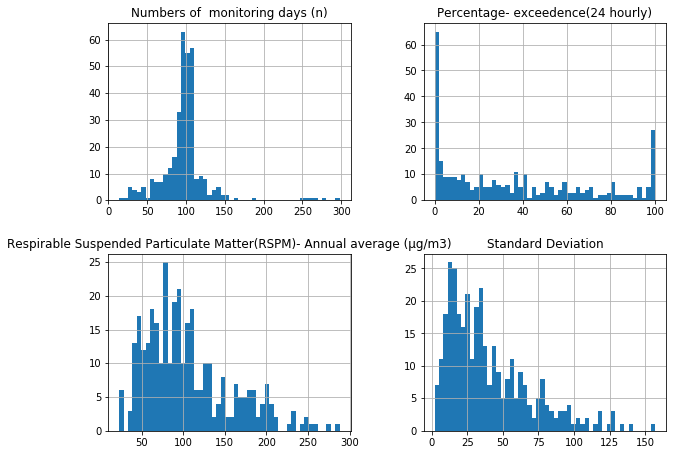

In [6]:
data.hist(bins=50, figsize=(10,7.5))

In [7]:
data=data.drop(['City','Location','State'],axis=1)

In [8]:
data.head()

,Type,Numbers of monitoring days (n),Respirable Suspended Particulate Matter(RSPM)- Annual average (µg/m3),Standard Deviation,Percentage- exceedence(24 hourly),Air Quality
0,Industrial,91,50,17,0,Low
1,Industrial,107,95,33,7,Moderate
2,Industrial,108,99,33,7,Moderate
3,Residential and other,108,49,17,0,Moderate
4,Residential and other,107,101,28,50,Critical


In [9]:
data.isnull().sum()

Type                                                                      0
Numbers of  monitoring days (n)                                           0
Respirable Suspended Particulate Matter(RSPM)- Annual average (µg/m3)     0
Standard Deviation                                                        0
Percentage- exceedence(24 hourly)                                         0
Air Quality                                                              19
dtype: int64

In [10]:
X=data.iloc[:,:-1]
Y=data.iloc[:,5]

In [11]:
print(X.head())
print(Y.head())

                    Type  Numbers of  monitoring days (n)  \
0             Industrial                               91   
1             Industrial                              107   
2             Industrial                              108   
3  Residential and other                              108   
4  Residential and other                              107   

   Respirable Suspended Particulate Matter(RSPM)- Annual average (µg/m3)  \
0                                                 50                       
1                                                 95                       
2                                                 99                       
3                                                 49                       
4                                                101                       

   Standard Deviation  Percentage- exceedence(24 hourly)  
0                  17                                  0  
1                  33                                  7  

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X = pd.get_dummies(X,prefix_sep = '_',columns=["Type"])
print(X)
Y= pd.get_dummies(Y,prefix_sep = '_')
print(Y)


     Numbers of  monitoring days (n)  \
0                                 91   
1                                107   
2                                108   
3                                108   
4                                107   
5                                108   
6                                 95   
7                                 89   
8                                110   
9                                120   
10                               120   
11                               120   
12                               118   
13                               119   
14                               119   
15                               103   
16                               107   
17                               109   
18                                30   
19                               109   
20                                65   
21                               298   
22                               268   
23                               278   


In [13]:
X.isnull().sum()
Y.isnull().sum()

Critical    0
High        0
Low         0
Moderate    0
dtype: int64

In [14]:
X = X.values[:, :-1]
Y = Y.values[:,:-1]

In [15]:
print(X)
print(Y)

[[ 91  50  17   0   1   0]
 [107  95  33   7   1   0]
 [108  99  33   7   1   0]
 ...
 [103 110  78  25   1   0]
 [105 105  90  36   0   1]
 [105 101  92  37   0   1]]
[[0 0 1]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [1 0 0]
 [1 0 0]]


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scale1=StandardScaler()

In [18]:
scaled1=scale1.fit_transform(X)

In [19]:
scaled1

array([[-2.17624936e-01, -1.05861545e+00, -7.78401031e-01,
        -1.07281024e+00,  1.37715349e+00, -1.26674826e+00],
       [ 2.73538648e-01, -1.93692419e-01, -2.33733070e-01,
        -8.63116091e-01,  1.37715349e+00, -1.26674826e+00],
       [ 3.04236372e-01, -1.16810372e-01, -2.33733070e-01,
        -8.63116091e-01,  1.37715349e+00, -1.26674826e+00],
       ...,
       [ 1.50747752e-01,  9.46152574e-02,  1.29814557e+00,
        -3.23902568e-01,  1.37715349e+00, -1.26674826e+00],
       [ 2.12143200e-01, -1.48730151e-03,  1.70664654e+00,
         5.61680754e-03, -7.26135474e-01,  7.89422831e-01],
       [ 2.12143200e-01, -7.83693486e-02,  1.77473004e+00,
         3.55731144e-02, -7.26135474e-01,  7.89422831e-01]])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [23]:
Y_pred = clf.predict(X_test)
print(clf.score(X_test,Y_test))

0.6617647058823529


In [24]:
from sklearn.metrics import multilabel_confusion_matrix
cm = multilabel_confusion_matrix(Y_test, Y_pred)
cm

array([[[41,  0],
        [ 3, 24]],

       [[43,  1],
        [18,  6]],

       [[67,  0],
        [ 1,  0]]], dtype=int64)

In [25]:
print(X_test)
print(Y_pred)

[[ 61 180 129  69   0   1]
 [ 95 198 141  67   0   1]
 [ 90 113  70  26   1   0]
 [ 92  43  23   2   0   1]
 [ 86  47  13   0   0   1]
 [ 84 168  16 100   0   1]
 [103  26   4   0   0   0]
 [ 95 163 103  45   1   0]
 [ 95  62  18   4   0   1]
 [ 70 160  95  71   0   1]
 [ 93  76  19  11   0   1]
 [104  90  13  24   0   1]
 [104 153  23  51   1   0]
 [100  95  13  37   0   1]
 [119  62  36  15   0   1]
 [ 54  67  10   0   1   0]
 [ 94  48  33   8   0   1]
 [105 101  92  37   0   1]
 [ 89 192  20  99   1   0]
 [132  90  38  49   0   1]
 [ 97  57  16   0   0   1]
 [107  62  35  16   0   1]
 [ 96 134  97  52   0   1]
 [ 57 103  62  11   1   0]
 [107 199  26  97   1   0]
 [ 77 174  78  77   0   1]
 [ 90 100  36   7   1   0]
 [107  63   6   0   0   1]
 [ 71 121   8 100   0   1]
 [ 99 129  49  71   0   1]
 [ 43  68  29  21   0   1]
 [126  67  38  31   0   0]
 [104  88  24  21   0   1]
 [106  88  31  24   0   1]
 [111 203 118  81   0   0]
 [103 108  55  47   0   1]
 [105 149  24  47   1   0]
 